In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

## Definition of a test function

We define a function "func" with a known integral, which we cast as another function "func_integral".

In [2]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [3]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float64) + 0.5) / np.float64(num)

Text(0, 0.5, 'func')

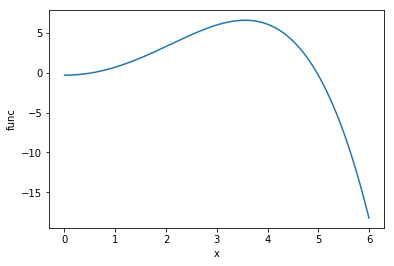

In [4]:
plt.plot(x, func(x))
plt.xlabel('x')
plt.ylabel('func')

Text(0, 0.5, 'func_integral')

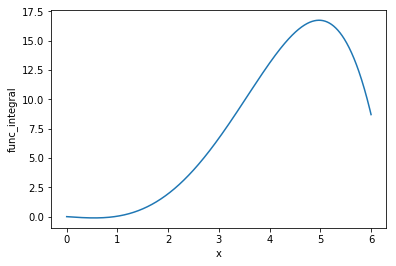

In [5]:
plt.plot(x, func_integral(x))
plt.xlabel('x')
plt.ylabel('func_integral')

## Trapezoid method for integration

We can use the trapezoid method to integrate the function. Basically, this is a weighted some of a bunch of different, equally spaced locations. It is equal to the integration of the linear interpolation of the function between the equally spaced points.

In [6]:
range = [0., 5.] # a, b
num = 5555
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)

In [7]:
traps_weights = np.ones(num, dtype=np.float64)
traps_weights[0] = traps_weights[0] * 0.5
traps_weights[-1] = traps_weights[-1] * 0.5

Except for the end-points, this is just equivalent to adding up the function in steps with spacing dx, weighted by dx.

In [8]:
print(traps_weights)

[0.5 1.  1.  ... 1.  1.  0.5]


In [9]:
traps_integral = (func(x) * traps_weights * dx).sum()
print(traps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(traps_integral - real_integral)
print((traps_integral - real_integral) / real_integral)

16.729165906866243
16.729166666666664
-7.598004216902154e-07
-4.541770889306394e-08


## Simpsons method

If the trapezoid method is the integration of a linear interpolation, Simpson's method is the integration of a quadratic interpolation, where the interpolation done within pairs of intervals, or triplets of points.

In [10]:
num = 1001
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num - 1.)
dx = (range[1] - range[0]) / np.float64(num - 1.)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

In [11]:
print(simps_weights)

[0.33333333 1.33333333 0.66666667 ... 0.66666667 1.33333333 0.33333333]


In [12]:
simps_integral = (func(x) * simps_weights * dx).sum()
print(simps_integral)
real_integral = func_integral(range[1]) - func_integral(range[0])
print(real_integral)
print(simps_integral - real_integral)
print((simps_integral - real_integral) / real_integral)

16.72916666664583
16.729166666666664
-2.0833113012486137e-11
-1.245316842589458e-12


## Remapping integration limits

In order to deal with integrations to infinity, or for other reasons, it can be useful to remap integration limits. In this example, we integration $e^{-x}$ from 0 to $\infty$.

In [13]:
def func(x=None):
    return (np.exp(- x))

In [14]:
def func_rescale(xp=None, q=None):
    x = q * (1. + xp) / (1. - xp)
    weight = 2. * q / (1. - xp)**2
    return (weight * func(x=x))

In [23]:
num = 21
range = np.array([-1., 1.], dtype=np.float64)
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num)
dx = (range[1] - range[0]) / np.float64(num)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

There is a parameter $q$ in the remapping that needs to be set. The integration is most accurate if $q$ is somewhere near where the integral reaches about half its total value.

In [24]:
q = 0.1
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

-0.14055535277057674


In [25]:
q = 1.
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

8.037456998621906e-06


In [26]:
q = 10.
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

3.9060644093869e-05


## Fixed-order Gaussian quadrature

With only $N$ points, Gaussian quadrature achieves a really high order of integration ($2N-1$). Here we explicitly perform 4th order Gaussian quadrature.

In [19]:
y1 = np.float64(0.339981043585)
y2 = np.float64(0.861136311594)
w1 = np.float64(0.652145154862)
w2 = np.float64(0.347854845137)
xp = np.array([- y2, - y1, y1, y2], dtype=np.float64)
gauss_weights = np.array([w2, w1, w1, w2], dtype=np.float64)

In [20]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [21]:
range = np.array([0., 5.], dtype=np.float64)
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.7291666667
16.7291666667
-1.53335122377e-11


It will work really well up to 7th order polynomials.

In [22]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8.)

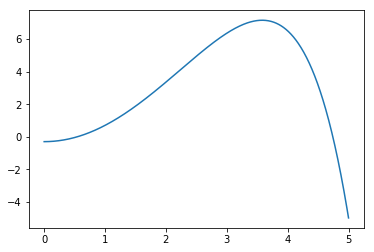

In [23]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [24]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

16.1711309524
16.1711309524
-1.33404398639e-11


For 8th order polynomials and above, it will start to exhibit approximation errors.

In [25]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7 + 0.00002 * x**8)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8. + 0.00002 * x**9 / 9.)

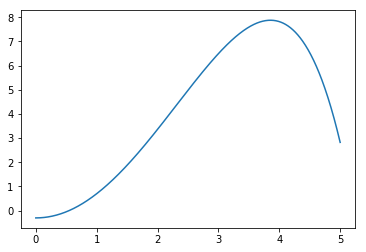

In [26]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [27]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770994238


## SciPy Implementation

SciPy has a module for integration using these and other techniques. We can reproduce the above results, and also easily reach to higher order.

In [28]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=4)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5105229592
20.5114087302
-0.000885770975056


In [29]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=5)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)

20.5114087302
20.5114087302
0.0


Here we return to the exponential, which shows how to remap this to the range [-1, 1] and demonstrates performance of fixed_quad.

In [30]:
def func(x=None):
    return (np.exp(- x))

def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [31]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=5)
print(gauss_integral)
print(gauss_integral - 1.)

1.00263507657
0.00263507656551


In [32]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=20)
print(gauss_integral)
print(gauss_integral - 1.)

1.00000042719
4.27190940622e-07


But the method is quite bad if there is a singularity, as in $1/\sqrt{1-x^2}$.

In [92]:
def func_f(x=None):
    return (1.)

def func(x=None):
    return (func_f(x) * (1. / np.sqrt(1. - x**2)))

In [94]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=59)
print(gauss_integral)
print(gauss_integral - np.pi)

3.1123261028
-0.0292665507855


Gauss-Chebyshev polynomials are the right thing to use for it.

In [95]:
(x, weight) = np.polynomial.chebyshev.chebgauss(10)

In [96]:
print(x)

[ 0.98768834  0.89100652  0.70710678  0.4539905   0.15643447 -0.15643447
 -0.4539905  -0.70710678 -0.89100652 -0.98768834]


In [97]:
print(weight)

[ 0.31415927  0.31415927  0.31415927  0.31415927  0.31415927  0.31415927
  0.31415927  0.31415927  0.31415927  0.31415927]


In [98]:
gausscheb_integral = (func_f(x) * weight).sum()
print(gausscheb_integral)
print(gausscheb_integral - np.pi)

3.14159265359
0.0


## A physical example: nuclear reaction rates

We express the integrand in terms of $x= E/kT$. The integral can be parametrized by $E_c/kT$, where $E_c$ is a Coulomb energy related to when tunneling becomes possible.

In [1]:
def r12_f(x=None, eckT=None):
    return(1. * np.exp(- (eckT / x)**0.5))

To test convergence, we use a high order and lower order Gauss-Laguerre set of weights.

In [2]:
from numpy.polynomial.laguerre import laggauss
(lg_x, lg_weights) = laggauss(100)
(lg_x_50, lg_weights_50) = laggauss(50)

In [3]:
print((r12_f(x=lg_x, eckT=0.1) * lg_weights).sum())

0.6341377832869692


We will plot the integral as a function of $R= E_c/kT$.

In [5]:
neckT = 300
lneckT_range = np.log([0.1, 100000.])
lneckT = lneckT_range[0] + (lneckT_range[1] - lneckT_range[0]) * np.arange(neckT) / (np.float64(neckT) - 1.)
eckT = np.exp(lneckT)

In [6]:
r12 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12[indx] = (r12_f(lg_x, eckT=eckT[indx]) * lg_weights).sum()

In [7]:
r12_50 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12_50[indx] = (r12_f(lg_x_50, eckT=eckT[indx]) * lg_weights_50).sum()

Text(0, 0.5, 'log$_{10}$ I(R)')

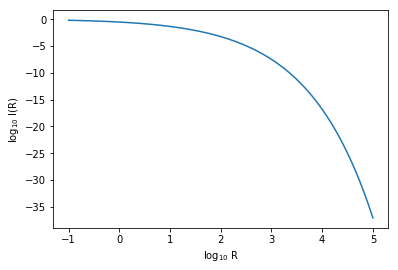

In [8]:
plt.plot(np.log10(eckT), np.log10(r12))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

Text(0, 0.5, 'log$_{10}$ I(R)')

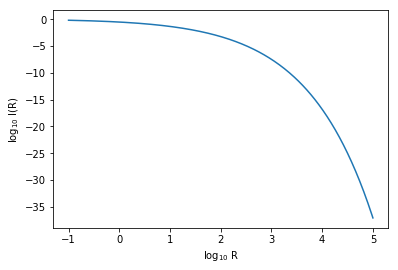

In [9]:
plt.plot(np.log10(eckT), np.log10(r12_50))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

And we can see how well it is converging, which in this case is reasonably well near the typical value at the center of a star of $R\sim 1000$.

Text(0, 0.5, 'log$_{10}$ (I$_{50}$(R) - I$_{100}$(R)) / I$_{100}$(R)')

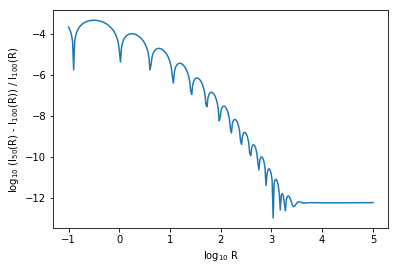

In [10]:
plt.plot(np.log10(eckT), np.log10(np.abs((r12_50 - r12) / r12)))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ (I$_{50}$(R) - I$_{100}$(R)) / I$_{100}$(R)')

Now we can plot the actual reaction rate per each type of particle as a function of $kT/E_c$, with the weighting by $\sqrt{E_c/kT}$.

Text(0, 0.5, 'log$_{10}$ $\\sqrt{R}$ I(R)')

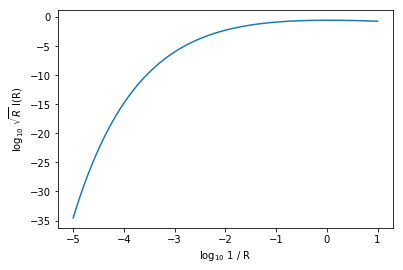

In [11]:
plt.plot(np.log10(1. / eckT), np.log10(r12 * np.sqrt(eckT)))
plt.xlabel('log$_{10}$ 1 / R')
plt.ylabel('log$_{10}$ $\sqrt{R}$ I(R)')

Zooming in, we can see that in the relevant range it is a very steep function of temperature. This is what makes the core of stars very stable; a very slight increase in temperature (due to a slight compression of the gas) will generate more energy and push the star back to its previous density.

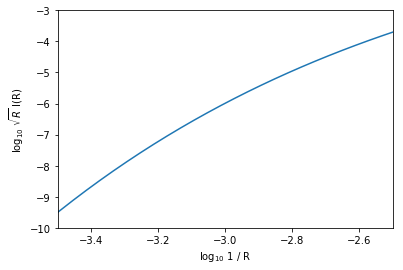

In [108]:
plt.plot(np.log10(1. / eckT), np.log10(r12 * np.sqrt(eckT)))
plt.xlim((-3.5, -2.5))
plt.ylim((-10, -3.))
plt.xlabel('log$_{10}$ 1 / R')
plt.ylabel('log$_{10}$ $\sqrt{R}$ I(R)')

## Monte Carlo methods

Mean value integration is the simplest practical Monte Carlo method. These methods in general are not cost-effective in low numbers of dimensions, but are so for higher dimensional integrals.

In [109]:
def func_1d_gauss(x=None, sigma=1., mean=0.):
    return(np.exp(- 0.5 * (x - mean)**2 / sigma**2) / np.sqrt(2. * np.pi) / sigma)

In [110]:
num = 1000000
real_integral = 1.
prange = [- 5., 5.]
xrandom = prange[0] + (prange[1] - prange[0]) * np.random.random(size=num)
mc_integral = (prange[1] - prange[0]) * func_1d_gauss(xrandom).sum() / np.float64(num) 
print(real_integral)
print(mc_integral)
print(real_integral - mc_integral)

1.0
0.999112735374
0.000887264626294


In [86]:
def func_6d_gauss(x=None, sigma=np.ones(6), mean=np.zeros(6)):
    ndim = 6
    xp = np.zeros(x.shape[1])
    for indx in np.arange(ndim):
        xp = xp + ((x[indx, :] - mean[indx]) / sigma[indx])**2
    denom = 1.
    for indx in np.arange(ndim):
        denom = denom * sigma[indx]
    return(np.exp(- 0.5 * xp) / np.sqrt(2. * np.pi)**ndim / denom)

In [91]:
num = 10000000
real_integral = 1.
prange = [- 5., 5.]
xrandom = prange[0] + (prange[1] - prange[0]) * np.random.random(size=(6, num))
mc_integral = (prange[1] - prange[0])**6 * func_6d_gauss(x=xrandom).sum() / np.float64(num) 
print(real_integral)
print(mc_integral)
print(real_integral - mc_integral)

1.0
1.00199471721
-0.00199471720565
